In [75]:
import json
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re
import numpy as np
from nltk.stem.porter import *
import collections
from sklearn.pipeline import Pipeline
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC  
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier

In [5]:
#Load Dataset
def Load_data(path):
    with open(path) as json_data:
        data=json.load(json_data)
    new_data = []
    for item in data:
        new_entry = {}
        for k,v in item.items():
        # a dictionary will return True for isinstance(v, dict)
            if not isinstance(v, dict):
            # v is not a dictionary here
                new_entry[k] = v
            else:
            # v is a dictionary, so we flatten it
                 for a,b in v.items():
                     new_entry[a] = b
        new_data.append(new_entry)
    return pd.DataFrame(new_data)


path ='/Users/Desktop/Model/Tweets.json'
tweet=Load_data(path)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 2 columns):
tag     871 non-null int64
text    871 non-null object
dtypes: int64(1), object(1)
memory usage: 13.7+ KB


,tag,text
0,1,#Saudi Cabinet restructuring meant to upgrade ...
1,0,Way to Go @Netflix. #Holocaust next? #SaudiAra...
2,1,The 1st trial session of the 11 killers of #Sa...
3,0,Was glued to my desk/PC for most part of the a...
4,1,THE three decades ban on cinemas in Saudi Arab...


In [6]:
tweet.info()
tweet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 2 columns):
tag     871 non-null int64
text    871 non-null object
dtypes: int64(1), object(1)
memory usage: 13.7+ KB


,tag,text
0,1,#Saudi Cabinet restructuring meant to upgrade ...
1,0,Way to Go @Netflix. #Holocaust next? #SaudiAra...
2,1,The 1st trial session of the 11 killers of #Sa...
3,0,Was glued to my desk/PC for most part of the a...
4,1,THE three decades ban on cinemas in Saudi Arab...


# Preprocessing



1-Removal Stop Words


In [9]:

nltk.download('stopwords')
stop = set(stopwords.words("english"))
tweet['text']=tweet['text'].apply(lambda x:' '.join(word for word in x.split() if word not in (stop)))


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Mayona/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
tweet.head()

,tag,text
0,1,#Saudi Cabinet restructuring meant upgrade sta...
1,0,Way Go @Netflix. #Holocaust next? #SaudiArabia...
2,1,The 1st trial session 11 killers #Saudi journa...
3,0,Was glued desk/PC part arvo @ work watching #s...
4,1,THE three decades ban cinemas Saudi Arabia lif...


2- lowercase



In [11]:
def lowercase(tweet):
    tweet = tweet.lower()
    return tweet

tweet['text'] = tweet['text'].apply(lowercase)


In [12]:
tweet['text'].head()

0    #saudi cabinet restructuring meant upgrade sta...
1    way go @netflix. #holocaust next? #saudiarabia...
2    the 1st trial session 11 killers #saudi journa...
3    was glued desk/pc part arvo @ work watching #s...
4    the three decades ban cinemas saudi arabia lif...
Name: text, dtype: object

3-Clean tweets text by removing links, special characters


In [13]:
def processTweet(tweet):
    tweet = re.sub(r'\&\w*;', '', tweet)
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)
    # Remove words with 2 or fewer letters
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ') 
    return tweet

In [17]:
tweet['text'] = tweet['text'].apply(processTweet)
tweet['text'].head(n=20)

0     cabinet restructuring meant upgrade standard s...
1     way @netflix. next? made @netflix delete comed...
2     the 1st trial session killers journalist start...
3     was glued desk/ part arvo @ work watching saga...
4     the three decades ban cinemas saudi arabia lif...
5     thursday, saudi king salman ordered reshufflin...
6     meet rising model who, , sights set global suc...
7     trends president . @ahmedalhamli concludes pro...
8     recently admitted source who' writing ' articl...
9     arabia unveils ' first entertainment complex s...
10    .@secpompeo meet / leaders discuss key bilater...
11         king announces plans set saudi space agency 
12    ejar, real estate rental program ministry hous...
13    king fahd university petroleum minerals positi...
14    key suspect khashoggi trial former top royal a...
15    saudi parliament () sets minimal marriage age ...
16    beautiful @reuters photo @aljanadriafest. men ...
17    arabia awards first major wind project wor

4-Removing Twitter Handles (@user)

In [20]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt  
tweet['text']=np.vectorize(remove_pattern)(tweet['text'], "@[\w]*")



5- Removal  none alphabetic characters.

In [21]:
tweet['text'] = tweet['text'].replace('[^a-zA-Z0-9 ]', '', regex=True)
tweet['text'].head()

0    cabinet restructuring meant upgrade standard s...
1    way  next made  delete comedy show accused cov...
2    the 1st trial session killers journalist start...
3    was glued desk part arvo  work watching saga u...
4    the three decades ban cinemas saudi arabia lif...
Name: text, dtype: object

In [23]:
nltk.download('stopwords')
stop = set(stopwords.words("english"))
tweet['text']=tweet['text'].apply(lambda x:' '.join(word for word in x.split() if word not in (stop)))



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Mayona/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
tweet['text']

0      cabinet restructuring meant upgrade standard s...
1      way next made delete comedy show accused cover...
2      1st trial session killers journalist started t...
3      glued desk part arvo work watching saga unfold...
4      three decades ban cinemas saudi arabia lifted ...
5      thursday saudi king salman ordered reshuffling...
6      meet rising model sights set global success mi...
7      trends president concludes productive meeting ...
8      recently admitted source writing articles magg...
9      arabia unveils first entertainment complex spa...
10     meet leaders discuss key bilateral regional pr...
11           king announces plans set saudi space agency
12     ejar real estate rental program ministry housi...
13     king fahd university petroleum minerals positi...
14     key suspect khashoggi trial former top royal a...
15     saudi parliament sets minimal marriage age gen...
16     beautiful photo men fire weapons performing tr...
17     arabia awards first majo

6- Stemming


In [29]:
ps = PorterStemmer()
tweet['Stemming'] = tweet['text'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split() ]))

In [30]:
tweet['Stemming']

0        cabinet restructur meant upgrad standard servic
1      way next made delet comedi show accus cover ja...
2      1st trial session killer journalist start toda...
3      glu desk part arvo work watch saga unfold 18yo...
4      three decad ban cinema saudi arabia lift decem...
5      thursday saudi king salman order reshuffl cabi...
6      meet rise model sight set global success miss ...
7      trend presid conclud product meet nation cente...
8      recent admit sourc write articl maggi salem ex...
9      arabia unveil first entertain complex span hectar
10     meet leader discuss key bilater region priorit...
11               king announc plan set saudi space agenc
12     ejar real estat rental program ministri hous s...
13     king fahd univers petroleum miner posit top en...
14     key suspect khashoggi trial former top royal a...
15     saudi parliament set minim marriag age gender ...
16     beauti photo men fire weapon perform tradit da...
17      arabia award first majo

In [31]:
tweet.head()

,tag,text,Stemming
0,1,cabinet restructuring meant upgrade standard s...,cabinet restructur meant upgrad standard servic
1,0,way next made delete comedy show accused cover...,way next made delet comedi show accus cover ja...
2,1,1st trial session killers journalist started t...,1st trial session killer journalist start toda...
3,0,glued desk part arvo work watching saga unfold...,glu desk part arvo work watch saga unfold 18yo...
4,1,three decades ban cinemas saudi arabia lifted ...,three decad ban cinema saudi arabia lift decem...


# build model with tweet['Stemming']


In [37]:
# tag=1 (tweet is real) tag=0 (tweet is fake)
x=tweet['Stemming']
y=tweet['tag']

In [46]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x, y, test_size=.20, random_state=0)

In [49]:
# bag of words ##
cv= CountVectorizer()
countx=cv.fit_transform(X_train)
#countx.shape
counttest=cv.transform(X_test)
#counttest.shape

## BOW & TF-IDF ##
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(countx)
# X_train_tfidf.shape
counttest=cv.transform(X_test)
#counttest.shape
X_test_tfidf=tfidf_transformer.transform(counttest)
#X_test_tfidf.shape



try the same algorithms 

# KNeighborsClassifier With BOW 


In [54]:

# search for an optimal value of K for KNN
K_rang=range(1,50)
K_score=[]
for k in K_rang:
    KNN=KNeighborsClassifier(n_neighbors=k)
    KNN.fit(countx, Y_train)
    predicted = KNN.predict(counttest)
    K_score.append(accuracy_score(Y_test, predicted))
print(K_score)


[0.5142857142857142, 0.4342857142857143, 0.44571428571428573, 0.4857142857142857, 0.6057142857142858, 0.45714285714285713, 0.6057142857142858, 0.5428571428571428, 0.6514285714285715, 0.5828571428571429, 0.6914285714285714, 0.6114285714285714, 0.7085714285714285, 0.6171428571428571, 0.7142857142857143, 0.6571428571428571, 0.7142857142857143, 0.6685714285714286, 0.72, 0.7028571428571428, 0.7542857142857143, 0.7428571428571429, 0.7314285714285714, 0.7314285714285714, 0.7257142857142858, 0.7428571428571429, 0.7371428571428571, 0.72, 0.72, 0.7085714285714285, 0.7142857142857143, 0.7085714285714285, 0.7142857142857143, 0.6971428571428572, 0.7085714285714285, 0.72, 0.72, 0.7142857142857143, 0.7085714285714285, 0.6971428571428572, 0.7142857142857143, 0.7028571428571428, 0.72, 0.72, 0.7028571428571428, 0.7142857142857143, 0.72, 0.7085714285714285, 0.7142857142857143]


Text(0, 0.5, 'cross-valdition Accuracy')

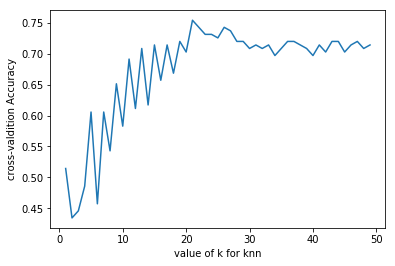

In [55]:

#polt the value of K for KNN
plt.plot(K_rang,K_score)
plt.xlabel("value of k for knn")
plt.ylabel("cross-valdition Accuracy")


In [58]:
# 21 is best

#build the model
KNN=KNeighborsClassifier(n_neighbors=21)
KNN.fit(countx, Y_train)
predicted = KNN.predict(counttest)
print(confusion_matrix(Y_test, predicted))  
print(classification_report(Y_test, predicted))  
print(accuracy_score(Y_test, predicted))
#accuracy_score is 0.7542857142857143

[[ 20  33]
 [ 10 112]]
              precision    recall  f1-score   support

           0       0.67      0.38      0.48        53
           1       0.77      0.92      0.84       122

   micro avg       0.75      0.75      0.75       175
   macro avg       0.72      0.65      0.66       175
weighted avg       0.74      0.75      0.73       175

0.7542857142857143


# KNeighborsClassifier with BOW and TF-IDF

In [59]:
# search for an optimal value of K for KNN
K_rang=range(1,50)
K_score=[]
for k in K_rang:
    KNN=KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train_tfidf, Y_train)
    predicted = KNN.predict(X_test_tfidf)
    K_score.append(accuracy_score(Y_test, predicted))
print(K_score)


[0.44571428571428573, 0.37714285714285717, 0.38285714285714284, 0.4857142857142857, 0.5771428571428572, 0.37142857142857144, 0.7257142857142858, 0.6685714285714286, 0.7714285714285715, 0.76, 0.7942857142857143, 0.8171428571428572, 0.8114285714285714, 0.8, 0.8114285714285714, 0.7828571428571428, 0.8, 0.8114285714285714, 0.8, 0.7942857142857143, 0.7942857142857143, 0.7771428571428571, 0.7885714285714286, 0.7942857142857143, 0.7828571428571428, 0.8057142857142857, 0.8, 0.8057142857142857, 0.8, 0.7942857142857143, 0.7828571428571428, 0.7942857142857143, 0.7942857142857143, 0.8057142857142857, 0.8, 0.8057142857142857, 0.8, 0.8, 0.7942857142857143, 0.8, 0.7885714285714286, 0.8, 0.7942857142857143, 0.7942857142857143, 0.7885714285714286, 0.8, 0.8057142857142857, 0.8114285714285714, 0.8057142857142857]


Text(0, 0.5, 'cross-valdition Accuracy')

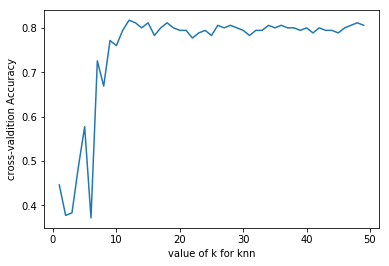

In [60]:

#polt the value of K for KNN
plt.plot(K_rang,K_score)
plt.xlabel("value of k for knn")
plt.ylabel("cross-valdition Accuracy")
# 12 is the best


In [61]:

#build the model
KNN=KNeighborsClassifier(n_neighbors=12)
KNN.fit(X_train_tfidf, Y_train)
predicted = KNN.predict(X_test_tfidf)


print(confusion_matrix(Y_test, predicted))  
print(classification_report(Y_test, predicted))  
print(accuracy_score(Y_test, predicted))
#accuracy_score is 0.8171428571428572

[[ 38  15]
 [ 17 105]]
              precision    recall  f1-score   support

           0       0.69      0.72      0.70        53
           1       0.88      0.86      0.87       122

   micro avg       0.82      0.82      0.82       175
   macro avg       0.78      0.79      0.79       175
weighted avg       0.82      0.82      0.82       175

0.8171428571428572


# MultinomialNB With BOW


In [64]:

NB=MultinomialNB()
NB.fit(countx, Y_train)
predicted = NB.predict(counttest)

print(confusion_matrix(Y_test, predicted))  
print(classification_report(Y_test, predicted))  
print(accuracy_score(Y_test, predicted))
# accuracy_score is 0.8285714285714286


[[ 41  12]
 [ 18 104]]
              precision    recall  f1-score   support

           0       0.69      0.77      0.73        53
           1       0.90      0.85      0.87       122

   micro avg       0.83      0.83      0.83       175
   macro avg       0.80      0.81      0.80       175
weighted avg       0.84      0.83      0.83       175

0.8285714285714286


# #MultinomialNB with BOW and TF-IDF


In [65]:

NB=MultinomialNB()
NB.fit(X_train_tfidf, Y_train)
predicted = NB.predict(X_test_tfidf)

print(confusion_matrix(Y_test, predicted))  
print(classification_report(Y_test, predicted))  
print(accuracy_score(Y_test, predicted))
# accuracy_score is 0.7828571428571428


[[ 22  31]
 [  7 115]]
              precision    recall  f1-score   support

           0       0.76      0.42      0.54        53
           1       0.79      0.94      0.86       122

   micro avg       0.78      0.78      0.78       175
   macro avg       0.77      0.68      0.70       175
weighted avg       0.78      0.78      0.76       175

0.7828571428571428


# #  Random ForestClassifier With BOW ##


In [66]:

RF=RandomForestClassifier(n_estimators=1000, random_state=0)
RF.fit(countx, Y_train)
predicted = RF.predict(counttest)


In [67]:

print(confusion_matrix(Y_test, predicted))  
print(classification_report(Y_test, predicted))  
print(accuracy_score(Y_test, predicted))
# accuracy_score is 0.8

[[ 33  20]
 [ 15 107]]
              precision    recall  f1-score   support

           0       0.69      0.62      0.65        53
           1       0.84      0.88      0.86       122

   micro avg       0.80      0.80      0.80       175
   macro avg       0.77      0.75      0.76       175
weighted avg       0.80      0.80      0.80       175

0.8


# # #  Random ForestClassifier BOW and TF-IDF ##


In [68]:
RF=RandomForestClassifier(n_estimators=1000, random_state=0) 
RF.fit(X_train_tfidf, Y_train)
predicted = RF.predict(X_test_tfidf)


In [69]:

print(confusion_matrix(Y_test, predicted))  
print(classification_report(Y_test, predicted))  
print(accuracy_score(Y_test, predicted))

# accuracy_score is 0.7657142857142857

[[ 28  25]
 [ 16 106]]
              precision    recall  f1-score   support

           0       0.64      0.53      0.58        53
           1       0.81      0.87      0.84       122

   micro avg       0.77      0.77      0.77       175
   macro avg       0.72      0.70      0.71       175
weighted avg       0.76      0.77      0.76       175

0.7657142857142857


# # support vector machine With BOW ##


In [70]:
svm = SVC(kernel='linear') 
svm.fit(countx, Y_train)
predicted = svm.predict(counttest)



In [71]:
print(confusion_matrix(Y_test, predicted))  
print(classification_report(Y_test, predicted))
print(accuracy_score(Y_test, predicted))

# accuracy_score is 0.7657142857142857


[[ 30  23]
 [ 18 104]]
              precision    recall  f1-score   support

           0       0.62      0.57      0.59        53
           1       0.82      0.85      0.84       122

   micro avg       0.77      0.77      0.77       175
   macro avg       0.72      0.71      0.71       175
weighted avg       0.76      0.77      0.76       175

0.7657142857142857


# # #  support vector machine BOW and TF-IDF ##


In [72]:

svm = SVC(kernel='linear') 
svm.fit(X_train_tfidf, Y_train)
predicted = svm.predict(X_test_tfidf)


In [73]:

print(confusion_matrix(Y_test, predicted))  
print(classification_report(Y_test, predicted))
print(accuracy_score(Y_test, predicted))

# accuracy_score is 0.8228571428571428

[[ 32  21]
 [ 10 112]]
              precision    recall  f1-score   support

           0       0.76      0.60      0.67        53
           1       0.84      0.92      0.88       122

   micro avg       0.82      0.82      0.82       175
   macro avg       0.80      0.76      0.78       175
weighted avg       0.82      0.82      0.82       175

0.8228571428571428


# GradientBoostingClassifier with BOW



In [82]:
GB = GradientBoostingClassifier(n_estimators=1000)
GB.fit(countx, Y_train)
predicted = GB.predict(counttest)



In [83]:
print(confusion_matrix(Y_test, predicted))  
print(classification_report(Y_test, predicted))  
print(accuracy_score(Y_test, predicted))
# accuracy_score is 0.8
#Accuracy changes when I rebuild the model 


[[ 33  20]
 [ 15 107]]
              precision    recall  f1-score   support

           0       0.69      0.62      0.65        53
           1       0.84      0.88      0.86       122

   micro avg       0.80      0.80      0.80       175
   macro avg       0.77      0.75      0.76       175
weighted avg       0.80      0.80      0.80       175

0.8


# GradientBoostingClassifierwith BOW and TF-IDF


In [86]:
GB = GradientBoostingClassifier(n_estimators=654)
GB.fit(X_train_tfidf, Y_train)
predicted = GB.predict(X_test_tfidf)

In [87]:
print(confusion_matrix(Y_test, predicted))  
print(classification_report(Y_test, predicted))  
print(accuracy_score(Y_test, predicted))
# accuracy_score is 0.7885714285714286
#Accuracy changes when I rebuild the model 

[[ 32  21]
 [ 16 106]]
              precision    recall  f1-score   support

           0       0.67      0.60      0.63        53
           1       0.83      0.87      0.85       122

   micro avg       0.79      0.79      0.79       175
   macro avg       0.75      0.74      0.74       175
weighted avg       0.78      0.79      0.79       175

0.7885714285714286


# build model with tweet['text']



In [88]:
# tag=1 (tweet is real) tag=0 (tweet is fake)
x=tweet['text']
y=tweet['tag']

In [89]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x, y, test_size=.20, random_state=0)


In [90]:

# bag of words ##
cv= CountVectorizer()
countx=cv.fit_transform(X_train)
#countx.shape
counttest=cv.transform(X_test)
#counttest.shape

## BOW & TF-IDF ##
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(countx)
# X_train_tfidf.shape
counttest=cv.transform(X_test)
#counttest.shape
X_test_tfidf=tfidf_transformer.transform(counttest)
#X_test_tfidf.shape




# KNeighborsClassifier With BOW 


In [91]:

# search for an optimal value of K for KNN
K_rang=range(1,50)
K_score=[]
for k in K_rang:
    KNN=KNeighborsClassifier(n_neighbors=k)
    KNN.fit(countx, Y_train)
    predicted = KNN.predict(counttest)
    K_score.append(accuracy_score(Y_test, predicted))
print(K_score)


[0.5142857142857142, 0.4228571428571429, 0.4342857142857143, 0.48, 0.5828571428571429, 0.45714285714285713, 0.6171428571428571, 0.49142857142857144, 0.6628571428571428, 0.5885714285714285, 0.6514285714285715, 0.6057142857142858, 0.72, 0.56, 0.7257142857142858, 0.6285714285714286, 0.7428571428571429, 0.6857142857142857, 0.72, 0.7085714285714285, 0.7314285714285714, 0.7142857142857143, 0.72, 0.7371428571428571, 0.7428571428571429, 0.7485714285714286, 0.7485714285714286, 0.7371428571428571, 0.7257142857142858, 0.7085714285714285, 0.72, 0.7028571428571428, 0.6971428571428572, 0.6914285714285714, 0.7257142857142858, 0.7257142857142858, 0.7314285714285714, 0.7371428571428571, 0.7085714285714285, 0.7028571428571428, 0.72, 0.72, 0.72, 0.72, 0.72, 0.7257142857142858, 0.7257142857142858, 0.7257142857142858, 0.7314285714285714]


Text(0, 0.5, 'cross-valdition Accuracy')

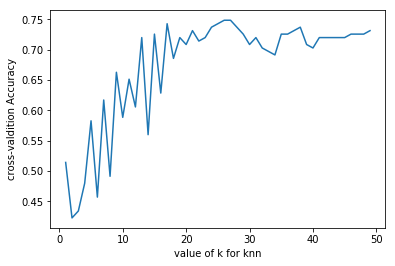

In [92]:
#polt the value of K for KNN
plt.plot(K_rang,K_score)
plt.xlabel("value of k for knn")
plt.ylabel("cross-valdition Accuracy")



In [100]:
# 27 is best

#build the model
KNN=KNeighborsClassifier(n_neighbors=27)
KNN.fit(countx, Y_train)
predicted = KNN.predict(counttest)
print(confusion_matrix(Y_test, predicted))  
print(classification_report(Y_test, predicted))  
print(accuracy_score(Y_test, predicted))
#accuracy_score is 0.7485714285714286


[[ 16  37]
 [  7 115]]
              precision    recall  f1-score   support

           0       0.70      0.30      0.42        53
           1       0.76      0.94      0.84       122

   micro avg       0.75      0.75      0.75       175
   macro avg       0.73      0.62      0.63       175
weighted avg       0.74      0.75      0.71       175

0.7485714285714286


# # KNeighborsClassifier with BOW and TF-IDF

In [101]:
# search for an optimal value of K for KNN
K_rang=range(1,50)
K_score=[]
for k in K_rang:
    KNN=KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train_tfidf, Y_train)
    predicted = KNN.predict(X_test_tfidf)
    K_score.append(accuracy_score(Y_test, predicted))
print(K_score)

[0.44571428571428573, 0.37714285714285717, 0.38285714285714284, 0.4114285714285714, 0.5485714285714286, 0.4057142857142857, 0.6914285714285714, 0.6457142857142857, 0.7942857142857143, 0.7885714285714286, 0.8228571428571428, 0.8285714285714286, 0.8114285714285714, 0.7942857142857143, 0.8285714285714286, 0.8114285714285714, 0.8285714285714286, 0.8285714285714286, 0.8114285714285714, 0.7885714285714286, 0.8057142857142857, 0.8057142857142857, 0.8057142857142857, 0.7885714285714286, 0.7771428571428571, 0.7828571428571428, 0.7942857142857143, 0.7885714285714286, 0.7942857142857143, 0.7885714285714286, 0.7942857142857143, 0.7828571428571428, 0.7885714285714286, 0.7942857142857143, 0.7885714285714286, 0.8057142857142857, 0.7885714285714286, 0.7942857142857143, 0.7828571428571428, 0.7942857142857143, 0.7942857142857143, 0.7885714285714286, 0.7657142857142857, 0.7828571428571428, 0.7771428571428571, 0.7771428571428571, 0.7714285714285715, 0.7714285714285715, 0.7771428571428571]


Text(0, 0.5, 'cross-valdition Accuracy')

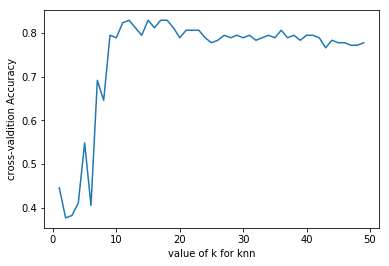

In [102]:
#polt the value of K for KNN
plt.plot(K_rang,K_score)
plt.xlabel("value of k for knn")
plt.ylabel("cross-valdition Accuracy")
# 18 is the best



In [116]:

#build the model
KNN=KNeighborsClassifier(n_neighbors=18)
KNN.fit(X_train_tfidf, Y_train)
predicted = KNN.predict(X_test_tfidf)


print(confusion_matrix(Y_test, predicted))  
print(classification_report(Y_test, predicted))  
print(accuracy_score(Y_test, predicted))
#accuracy_score is 0.8285714285714286

[[ 37  16]
 [ 14 108]]
              precision    recall  f1-score   support

           0       0.73      0.70      0.71        53
           1       0.87      0.89      0.88       122

   micro avg       0.83      0.83      0.83       175
   macro avg       0.80      0.79      0.79       175
weighted avg       0.83      0.83      0.83       175

0.8285714285714286


# #MultinomialNB with BOW 

In [117]:

NB=MultinomialNB()
NB.fit(countx, Y_train)
predicted = NB.predict(counttest)

print(confusion_matrix(Y_test, predicted))  
print(classification_report(Y_test, predicted))  
print(accuracy_score(Y_test, predicted))
# accuracy_score is 0.84


[[ 40  13]
 [ 15 107]]
              precision    recall  f1-score   support

           0       0.73      0.75      0.74        53
           1       0.89      0.88      0.88       122

   micro avg       0.84      0.84      0.84       175
   macro avg       0.81      0.82      0.81       175
weighted avg       0.84      0.84      0.84       175

0.84


# MultinomialNB with BOW and TF-IDF


In [118]:
NB=MultinomialNB()
NB.fit(X_train_tfidf, Y_train)
predicted = NB.predict(X_test_tfidf)

print(confusion_matrix(Y_test, predicted))  
print(classification_report(Y_test, predicted))  
print(accuracy_score(Y_test, predicted))
# accuracy_score is 0.8057142857142857




[[ 26  27]
 [  7 115]]
              precision    recall  f1-score   support

           0       0.79      0.49      0.60        53
           1       0.81      0.94      0.87       122

   micro avg       0.81      0.81      0.81       175
   macro avg       0.80      0.72      0.74       175
weighted avg       0.80      0.81      0.79       175

0.8057142857142857


# Random ForestClassifier With BOW

In [119]:
RF=RandomForestClassifier(n_estimators=1000, random_state=0)
RF.fit(countx, Y_train)
predicted = RF.predict(counttest)


In [120]:
print(confusion_matrix(Y_test, predicted))  
print(classification_report(Y_test, predicted))  
print(accuracy_score(Y_test, predicted))
# accuracy_score is 0.7942857142857143

[[ 30  23]
 [ 13 109]]
              precision    recall  f1-score   support

           0       0.70      0.57      0.62        53
           1       0.83      0.89      0.86       122

   micro avg       0.79      0.79      0.79       175
   macro avg       0.76      0.73      0.74       175
weighted avg       0.79      0.79      0.79       175

0.7942857142857143


# Random ForestClassifier BOW and TF-IDF 



In [121]:
RF=RandomForestClassifier(n_estimators=1000, random_state=0) 
RF.fit(X_train_tfidf, Y_train)
predicted = RF.predict(X_test_tfidf)


In [122]:
print(confusion_matrix(Y_test, predicted))  
print(classification_report(Y_test, predicted))  
print(accuracy_score(Y_test, predicted))

# accuracy_score is 0.7657142857142857

[[ 30  23]
 [ 18 104]]
              precision    recall  f1-score   support

           0       0.62      0.57      0.59        53
           1       0.82      0.85      0.84       122

   micro avg       0.77      0.77      0.77       175
   macro avg       0.72      0.71      0.71       175
weighted avg       0.76      0.77      0.76       175

0.7657142857142857


# # support vector machine With BOW ##



In [123]:

svm = SVC(kernel='linear') 
svm.fit(countx, Y_train)
predicted = svm.predict(counttest)


In [124]:
print(confusion_matrix(Y_test, predicted))  
print(classification_report(Y_test, predicted))
print(accuracy_score(Y_test, predicted))

# accuracy_score is 0.7657142857142857

[[ 32  21]
 [ 20 102]]
              precision    recall  f1-score   support

           0       0.62      0.60      0.61        53
           1       0.83      0.84      0.83       122

   micro avg       0.77      0.77      0.77       175
   macro avg       0.72      0.72      0.72       175
weighted avg       0.76      0.77      0.77       175

0.7657142857142857


# support vector machine BOW and TF-IDF ##


In [125]:
svm = SVC(kernel='linear') 
svm.fit(X_train_tfidf, Y_train)
predicted = svm.predict(X_test_tfidf)


In [126]:
print(confusion_matrix(Y_test, predicted))  
print(classification_report(Y_test, predicted))
print(accuracy_score(Y_test, predicted))

# accuracy_score is 0.8057142857142857

[[ 31  22]
 [ 12 110]]
              precision    recall  f1-score   support

           0       0.72      0.58      0.65        53
           1       0.83      0.90      0.87       122

   micro avg       0.81      0.81      0.81       175
   macro avg       0.78      0.74      0.76       175
weighted avg       0.80      0.81      0.80       175

0.8057142857142857


# GradientBoostingClassifier with BOW

In [131]:
GB = GradientBoostingClassifier(n_estimators=1000)
GB.fit(countx, Y_train)
predicted = GB.predict(counttest)


In [132]:
print(confusion_matrix(Y_test, predicted))  
print(classification_report(Y_test, predicted))  
print(accuracy_score(Y_test, predicted))
# accuracy_score is 0.7942857142857143
#Accuracy changes when I rebuild the model 



[[ 29  24]
 [ 12 110]]
              precision    recall  f1-score   support

           0       0.71      0.55      0.62        53
           1       0.82      0.90      0.86       122

   micro avg       0.79      0.79      0.79       175
   macro avg       0.76      0.72      0.74       175
weighted avg       0.79      0.79      0.79       175

0.7942857142857143


# GradientBoostingClassifierwith BOW and TF-IDF

In [133]:
GB = GradientBoostingClassifier(n_estimators=654)
GB.fit(X_train_tfidf, Y_train)
predicted = GB.predict(X_test_tfidf)


In [134]:
print(confusion_matrix(Y_test, predicted))  
print(classification_report(Y_test, predicted))  
print(accuracy_score(Y_test, predicted))
# accuracy_score is 0.7542857142857143
#Accuracy changes when I rebuild the model 

[[ 27  26]
 [ 17 105]]
              precision    recall  f1-score   support

           0       0.61      0.51      0.56        53
           1       0.80      0.86      0.83       122

   micro avg       0.75      0.75      0.75       175
   macro avg       0.71      0.69      0.69       175
weighted avg       0.74      0.75      0.75       175

0.7542857142857143
